In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(10,10)

### 0. $\quad f(x) = -2 \cdot \log(x) - 3x  - \log( 1 - x^2), \ x \in (0,1)    $

### $ \nabla f(x) =  \frac{-2}{x}-3+\frac{2x}{1-x^2}     $

### $\nabla^{2} f(x) = \frac{2}{x^2} + \frac{2 + 2x^2  }{(1-x^2)^2}    $

In [2]:
l=np.linspace(0,1,100)
f0=lambda x: -2*np.log(x)-3*x**2-np.log(1-x**2)
grad_f0 = lambda x: -2/x-3+(2*x)/(1-x**2)
hess_f0 = lambda x: 2/x**2+(2+2*x**2)/(1-x**2)**2

In [3]:
x_old = np.random.randint(20,90)/100
x_old=0.2
x_start=x_old
alpha=0.01*3
k_max=1000
tau=1e-7
hist_x=[x_old]
hist_grad=[grad_f0(x_old)]
for i in range(k_max):
    x_new=x_old-alpha*grad_f0(x_old)
    x_old=x_new
    hist_x.append(x_old)
    hist_grad.append(grad_f0(x_old))
    if np.linalg.norm(hist_grad[-1])**2<tau:
        break
print(i)
hist_x=np.array(hist_x)


5


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


(0, 1)

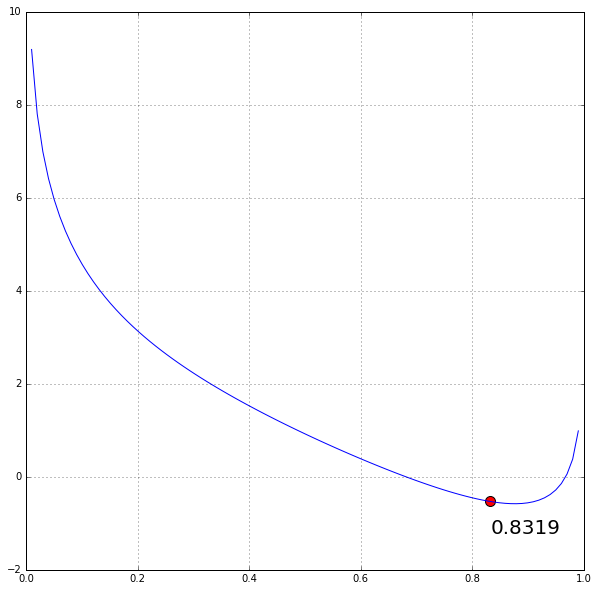

In [5]:
plt.plot(l,f0(l))
#plt.scatter(hist_x,f0(hist_x),c='red',s=50)
#plt.scatter(x_start,f0(x_start),c='yellow',s=50)
plt.scatter(hist_x[-1],f0(hist_x[-1]),c='red',s=100)
plt.text(hist_x[-1],f0(hist_x[-1])-0.7,'{}'.format(np.round(hist_x[-1],4)),fontsize=20)
plt.grid()
plt.xlim(0,1)
#plt.ylim(-0.5*1e7,2*1e7)

In [6]:
x_old = np.random.randint(0,100)/100
x_old=0.2
x_start=x_old
alpha=1
k_max=1000
tau=1e-7
hist_x=[x_old]
hist_grad=[grad_f0(x_old)]
for i in range(k_max):
    x_new=x_old-alpha*grad_f0(x_old)/(hess_f0(x_old))
    x_old=x_new
    hist_x.append(x_old)
    hist_grad.append(grad_f0(x_old))
    if np.linalg.norm(hist_grad[-1])**2<tau:
        break
print(i)
hist_x=np.array(hist_x)


5


Метод Ньютона за 5 итераций нашёл точку минимума

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


(0, 1)

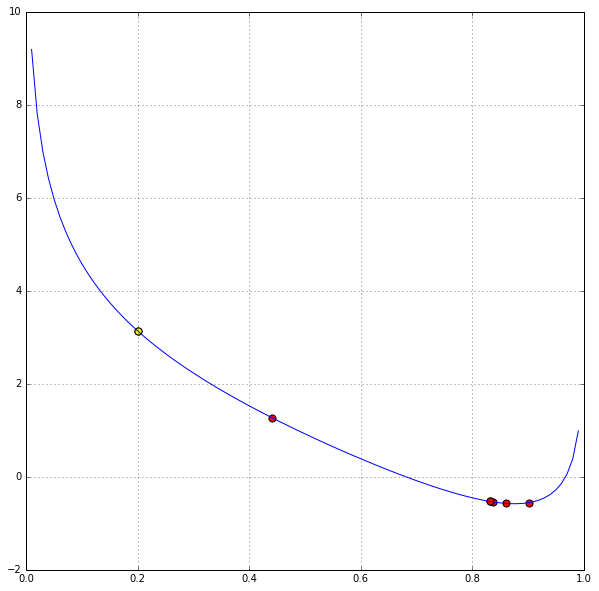

In [8]:
plt.plot(l,f0(l))
plt.scatter(hist_x,f0(hist_x),c='red',s=50)
plt.scatter(x_start,f0(x_start),c='yellow',s=50)
plt.grid()
plt.xlim(0,1)
#plt.ylim(-0.5*1e7,2*1e7)

## 1.  $\quad f(x,y) = x^{2} + 2 \cdot (y - x)^{2} $

//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


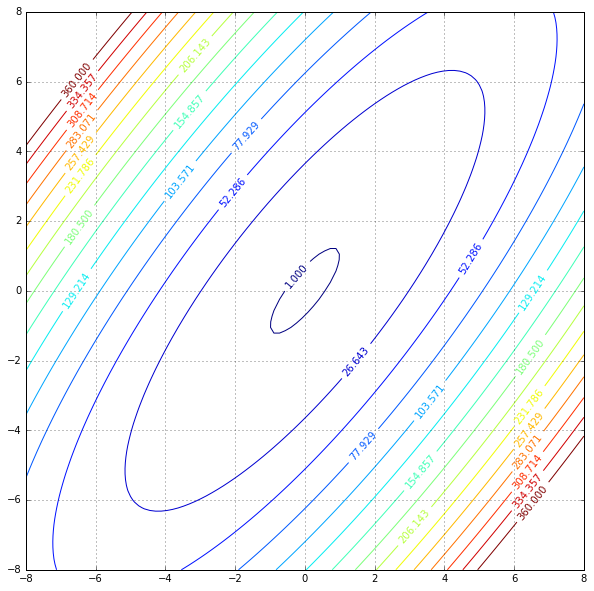

In [10]:
dom_x=np.linspace(-8,8,100)
x_,y_=np.meshgrid(dom_x,dom_x)
Z= (x_**2+2*(y_-x_)**2)
V=np.linspace(1,360,15)
cs=plt.contour(x_,y_,Z,V,cmap='jet')
plt.clabel(cs)
plt.grid()

### $\nabla f = (6 x - 4y, -4x + 4y)$
$ \vec x_{0} = random([-10,10],[-10,10]), \quad \vec x_{k} = \vec x_{k-1} - \alpha \cdot \nabla f(\vec x_{k-1}), \quad \vec x_{k} = \begin{pmatrix}
x_{k}\\
y_{k}
\end{pmatrix}
$

In [11]:
x=np.random.randint(-10,10,size=2)
x

array([ 6, -8])

In [12]:
x_old=x
x_new=x_old
alpha=0.1
k_max=1000
tau=0.01
nabla_f = lambda x: np.array([6*x[0]-4*x[1],-4*x[0]+4*x[1]])
hist_x=[x_old]
k=0
while np.linalg.norm(x_new-np.array([0,0]))**2>tau and k<k_max:
    x_new=x_old-alpha*nabla_f(x_old)
    hist_x.append(x_new)
    x_old=x_new
    k+=1
hist_x=np.array(hist_x)
k

36

Метод Градиентного спуска

//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


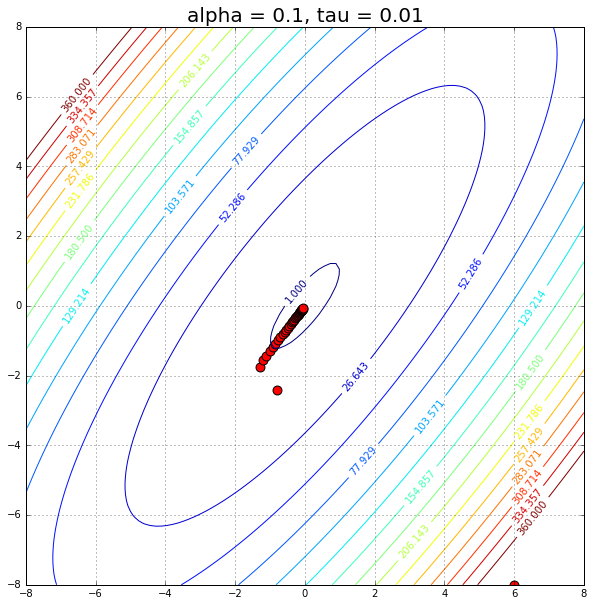

In [14]:
dom_x=np.linspace(-8,8,100)
x_,y_=np.meshgrid(dom_x,dom_x)
Z= (x_**2+2*(y_-x_)**2)
V=np.linspace(1,360,15)
cs=plt.contour(x_,y_,Z,V,cmap='jet')
plt.clabel(cs)
plt.scatter(hist_x[:,0],hist_x[:,1],s=80,c='r')
plt.xlim(-8,8)
plt.ylim(-8,8)
plt.title('alpha = {}, tau = {}'.format(alpha,tau),fontsize=20)
plt.grid()

### Метод Ньютона: 
$x_{k} = x_{k-1} - \alpha \cdot H^{-1} \cdot\nabla f(x_{k-1}), \quad H = \left (\frac{\partial^{2} f}{\partial x^{i}_{k-1} \partial x^{j}_{k-1}} \right ) $

$H = \begin{pmatrix}
6&-4\\
-4&4
\end{pmatrix} \to H^{-1} = \frac{1}{8} \cdot \begin{pmatrix}
4&4\\
4&6
\end{pmatrix}
$

In [15]:
x=np.random.randint(-10,10,size=2)
x_old=x
#x_old=np.array([2,-4])
x_new=x_old
alpha=1
k_max=1000
tau=0.00001
nabla_f = lambda x: np.array([6*x[0]-4*x[1],-4*x[0]+4*x[1]])
H_inv = (1/8)*np.array([[4,4],[4,6]])
hist_x=[x_old]
k=0
while np.linalg.norm(x_new-np.array([0,0]))**2>tau and k<k_max:
    x_new=x_old-alpha*H_inv.dot(nabla_f(x_old))
    hist_x.append(x_new)
    x_old=x_new
    k+=1
hist_x=np.array(hist_x)
k

1

Метод Ньютона нашёл оптимум за одну итерацию (почему?)

//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


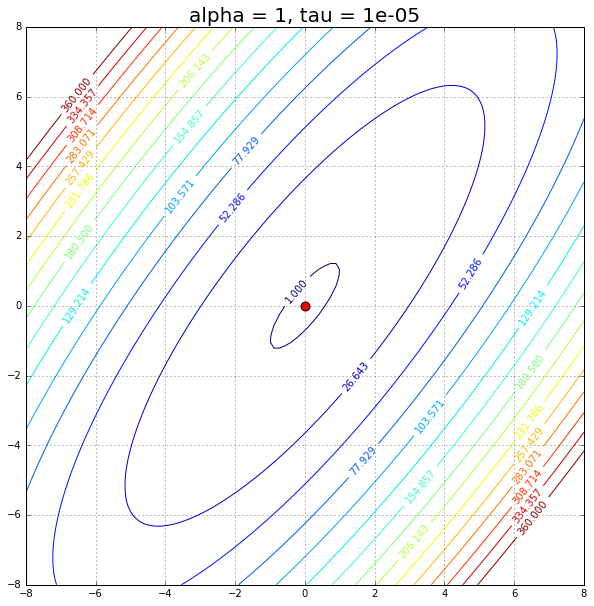

In [17]:
dom_x=np.linspace(-8,8,100)
x_,y_=np.meshgrid(dom_x,dom_x)
Z= (x_**2+2*(y_-x_)**2)
V=np.linspace(1,360,15)
cs=plt.contour(x_,y_,Z,V,cmap='jet')
plt.clabel(cs)
plt.scatter(hist_x[:,0],hist_x[:,1],s=80,c='r')
plt.xlim(-8,8)
plt.ylim(-8,8)
plt.title('alpha = {}, tau = {}'.format(alpha,tau),fontsize=20)
plt.grid()

## 2. $\quad f(x,y) = x^3+y^3-3 \cdot x \cdot y$

//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


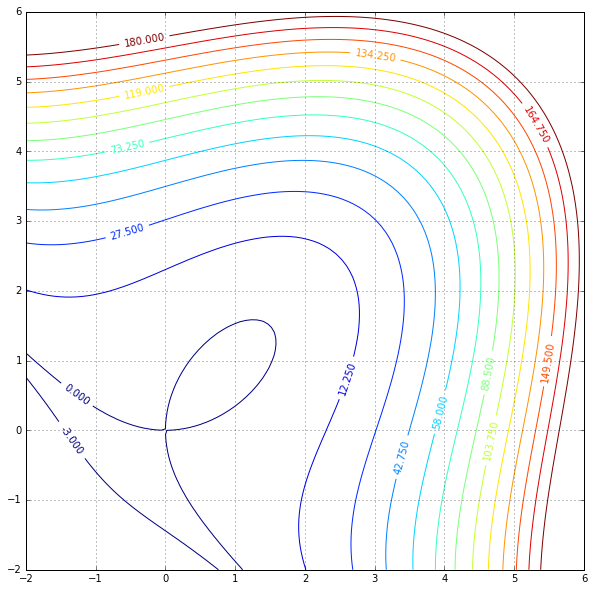

In [19]:
dom_x=np.linspace(-2,6,100)
x_,y_=np.meshgrid(dom_x,dom_x)
Z= x_**3+y_**3-3*x_*y_
V=np.linspace(-3,180,13)
cs=plt.contour(x_,y_,Z,V,cmap='jet')
cs1=plt.contour(x_,y_,Z,0,cmap='jet')

plt.clabel(cs)
plt.clabel(cs1)
plt.xlim(-2,6)
plt.ylim(-2,6)
plt.grid()

In [21]:
x=np.random.randint(-2,8,size=2)

x_old=x
x_new=x_old
alpha=0.01
k_max=10000
tau=0.01
nabla_f = lambda x: np.array([3*x[0]**2-3*x[1],3*x[1]**2-3*x[0]])
hist_x=[x_old]
k=0
while np.linalg.norm(x_new-np.array([0,0]))**2>tau and k<k_max:
    x_new=x_old-alpha*nabla_f(x_old)
    hist_x.append(x_new)
    x_old=x_new
    k+=1
hist_x=np.array(hist_x)


//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


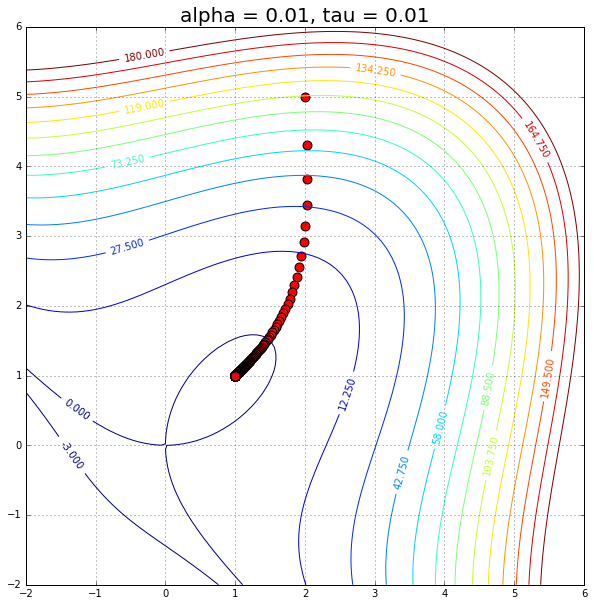

In [23]:
dom_x=np.linspace(-2,6,100)
x_,y_=np.meshgrid(dom_x,dom_x)
Z= x_**3+y_**3-3*x_*y_
V=np.linspace(-3,180,13)
cs=plt.contour(x_,y_,Z,V,cmap='jet')
cs1=plt.contour(x_,y_,Z,0,cmap='jet')

plt.clabel(cs)
plt.clabel(cs1)
plt.xlim(-2,6)
plt.ylim(-2,6)
plt.scatter(hist_x[:,0],hist_x[:,1],s=80,c='r')
plt.title('alpha = {}, tau = {}'.format(alpha,tau),fontsize=20)
plt.grid()

## 4. 

Задача линейной регрессии - найти прямую, которая "наилучшим образом" проходит через облако точек.

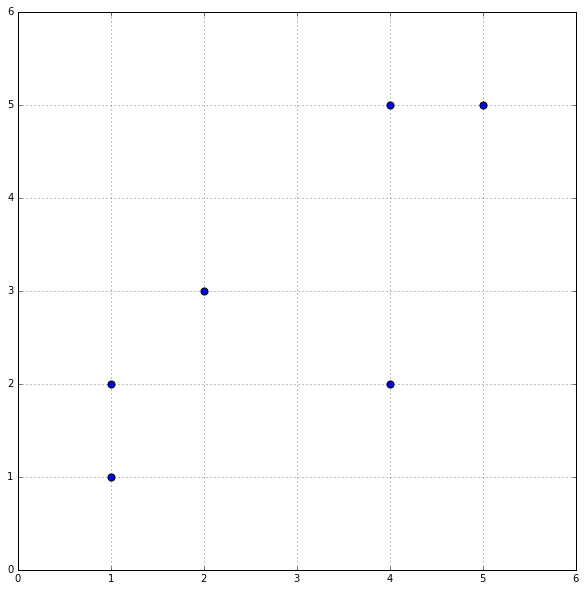

In [38]:
X=np.array([[1,1],[1,2],[2,3],[4,5],[5,5],[4,2]])
plt.scatter(X[:,0],X[:,1],s=50)
plt.grid()

Функционал, который оптимизируется в линейной регрессии можно записать как квадрат нормы разности целевой переменной и модели ($X \cdot w $)

### $ \quad f(w)= \Vert y - X \cdot w  \Vert_{2}^{2} \to \min\limits_{w} $ 

### $ \nabla f = \nabla \left( y^{T}y - 2y^{T}Xw + w^{T}X^{T}Xw     \right) = -2X^{T}y + 2X^{T}Xw  $

Линии уровня оптимизируемого функционала (в случае 2 переменных $w_{1} , w_{2}$):

//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
//anaconda/lib/python3.5/site-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


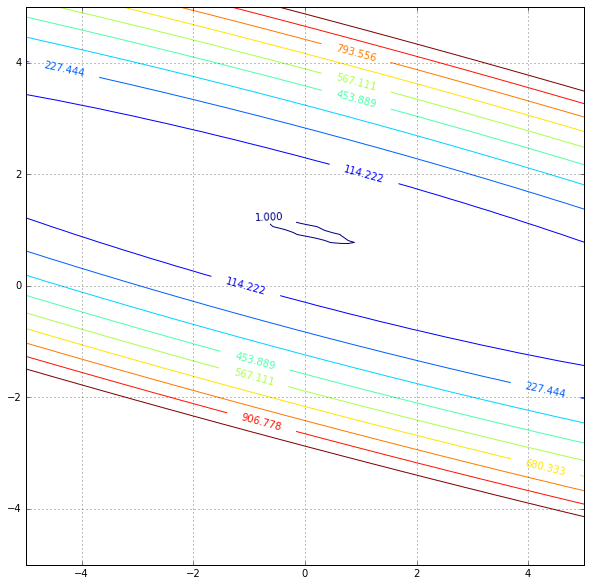

In [39]:
dom_x=np.linspace(-7,7,100)
x_,y_=np.meshgrid(dom_x,dom_x)
Z= sum([(X[i,1]-x_-y_*X[i,1])**2 for i in range(len(X))])
V=np.linspace(1,1020,10)
cs=plt.contour(x_,y_,Z,V,cmap='jet')
plt.clabel(cs)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid()

In [40]:
x=np.random.randint(-400,400,size=2)/100
x_old=x
x_new=x_old
alpha=0.001
feat=np.hstack((np.ones_like(X[:,1]).reshape(-1,1),X[:,1].reshape(-1,1)))
func = lambda w: np.linalg.norm(X[:,1] - feat.dot(w))**2
k_max=10000
tau=0.000000001
hist_x=[x_old]
k=0
x_new=x_old-alpha*(-2*feat.T.dot(X[:,1])+2*feat.T.dot(feat).dot(x_old))
hist_x.append(x_new)
while np.linalg.norm(x_new-x_old)**2>tau and k<k_max:
    x_old=x_new
    x_new=x_old-alpha*(-2*feat.T.dot(X[:,1])+2*feat.T.dot(feat).dot(x_old))
    hist_x.append(x_new)
    k+=1
hist_x=np.array(hist_x)
x

array([0.88, 1.67])

//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
//anaconda/lib/python3.5/site-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


[0.01320784 0.9964435 ]


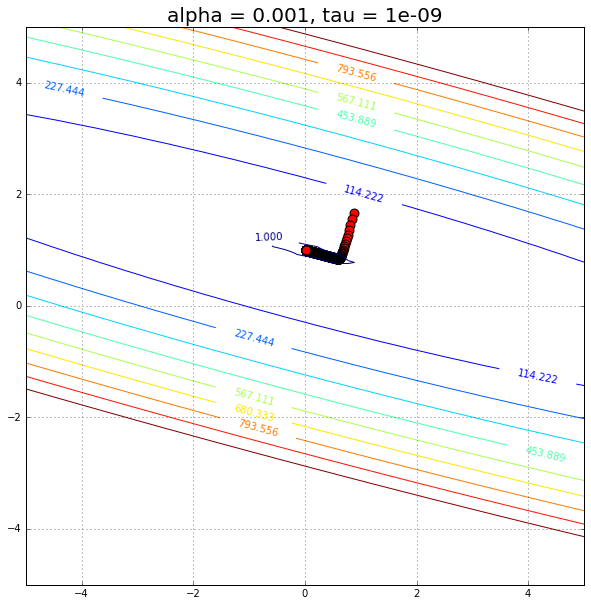

In [42]:
dom_x=np.linspace(-7,7,100)
x_,y_=np.meshgrid(dom_x,dom_x)
Z= sum([(X[i,1]-x_-y_*X[i,1])**2 for i in range(len(X))])
V=np.linspace(1,1020,10)
cs=plt.contour(x_,y_,Z,V,cmap='jet')
plt.scatter(hist_x[:,0],hist_x[:,1],c='r',s=80)
plt.clabel(cs)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title('alpha = {}, tau = {}'.format(alpha,tau),fontsize=20)
print(hist_x[-1])
plt.grid()

Полученная прямая после оптимизации:

(0, 6)

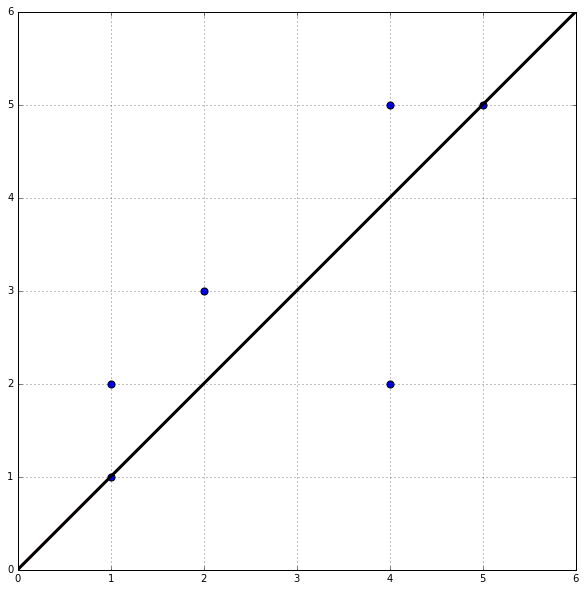

In [44]:
X=np.array([[1,1],[1,2],[2,3],[4,5],[5,5],[4,2]])
plt.scatter(X[:,0],X[:,1],s=50)
x_lim=np.linspace(0,6,100)
w=np.linalg.inv(feat.T.dot(feat)).dot(feat.T.dot(X[:,1]))
plt.plot(x_lim,hist_x[-1,0]+hist_x[-1,1]*x_lim,c='red')
plt.plot(x_lim,w[0]+w[1]*x_lim,c='black',linewidth=3)
plt.grid()
plt.xlim(0,6)
plt.ylim(0,6)

## 5. $ \quad f(x,y) = \sin(x) \cdot \cos(y^{2})    $ 

### $ \nabla f = \left(\cos(x) \cdot \cos(y^{2}), -2y \cdot \sin(x) \cdot \sin(y^{2}) \right)        $

### $ \nabla^2 f = \begin{pmatrix} 
-\sin(x) \cdot \cos(y^2) & -\cos(x) \cdot 2y \cdot \sin(y^2)\\
-\cos(x) \cdot 2y \cdot \sin(y^2) & -2 \sin(x) \sin(y^2) - 4y^2 \sin(x) \cos(y^2)
\end{pmatrix}   $  

//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


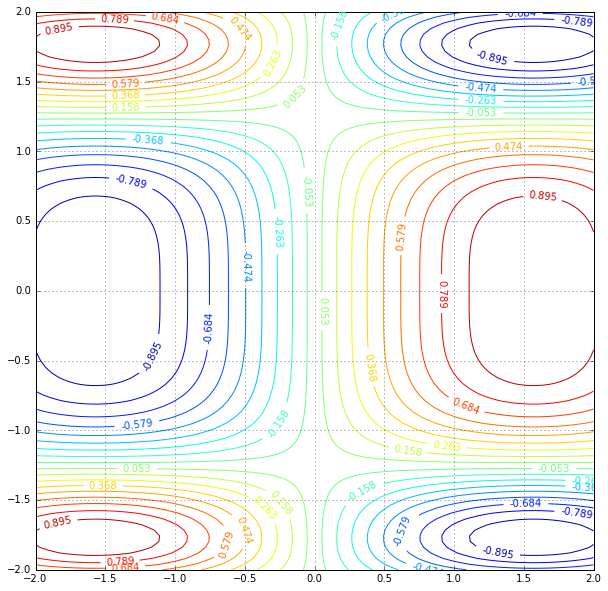

In [45]:
dom_x=np.linspace(-2,2,100)
x_,y_=np.meshgrid(dom_x,dom_x)
Z= np.sin(x_)*np.cos(y_**2)
V=np.linspace(-1,1,20)
cs=plt.contour(x_,y_,Z,V,cmap='jet')
plt.clabel(cs)
plt.grid()

In [46]:
x=np.random.randint(-200,200,size=2)/100
x_old=x
x_old=np.array([-1.5,1.5])
x_new=x_old
alpha=1
func = lambda x,y: np.sin(x)*np.cos(y**2)
grad_f = lambda x: np.array([np.cos(x[0])*np.cos(x[1]**2),-2*x[1]*np.sin(x[0])*np.sin(x[1]**2)])
hess_f = lambda x: np.array([[-np.sin(x[0])*np.cos(x[1]**2),-2*x[1]*np.sin(x[1]**2)*np.cos(x[0])],[-2*x[1]*np.sin(x[1]**2)*np.cos(x[0]),-2*np.sin(x[0])*np.sin(x[1]**2)-4*x[1]**2*np.sin(x[0])*np.cos(x[1]**2)]])
k_max=10000
tau=0.00011
hist_x=[x_old]
k=0
x_new=x_old-alpha*grad_f(x_old)
hist_x.append(x_new)
while np.linalg.norm(x_new-x_old)**2>tau and k<k_max:
    x_old=x_new
    x_new=x_old-alpha*np.linalg.inv(hess_f(x_old)).dot(grad_f(x_old))
    hist_x.append(x_new)
    k+=1
hist_x=np.array(hist_x)
k

9

//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


[-1.57079633 -0.01979126]


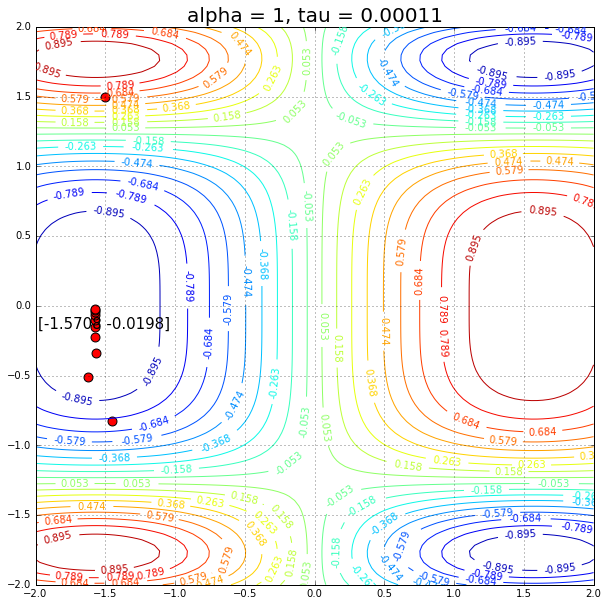

In [47]:
dom_x=np.linspace(-2,2,100)
x_,y_=np.meshgrid(dom_x,dom_x)
Z= np.sin(x_)*np.cos(y_**2)
V=np.linspace(-1,1,20)
cs=plt.contour(x_,y_,Z,V,cmap='jet')
plt.scatter(hist_x[:,0],hist_x[:,1],c='r',s=80)
plt.clabel(cs)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('alpha = {}, tau = {}'.format(alpha,tau),fontsize=20)
plt.text(-1.98,-0.16,'{}'.format(np.round(hist_x[-1],4)),fontsize=15)
print(hist_x[-1])
plt.clabel(cs)
plt.grid()

## 6.  $\quad f(x,y) = \sin \left (\frac{1}{2} \cdot x^{2} - \frac{1}{4} \cdot y^{2} +3 \right) \cdot \cos \left(2 \cdot x + 1 - e^{y}  \right) $

### $ \nabla f = \left( f'_{x}, f'_{y}  \right)   $

### $f'_{x} =x \cdot \cos \left( \frac{1}{2} \cdot x^{2} - \frac{1}{4} \cdot y^{2} + 3  \right)\cdot \cos \left( 2 x + 1 - e^{y} \right) -2  \sin \left( \frac{1}{2} \cdot x^{2} - \frac{1}{4} \cdot y^{2} + 3   \right) \cdot \sin \left(2x + 1 - e^{y}  \right)         $

### $f'_{y} =-\frac{1}{2}y \cdot \cos \left( \frac{1}{2} \cdot x^{2} - \frac{1}{4} \cdot y^{2} + 3  \right) \cdot \cos \left( 2 x + 1 - e^{y} \right) + e^{y} \cdot \sin \left( \frac{1}{2} \cdot x^{2} - \frac{1}{4} \cdot y^{2} + 3   \right) \cdot \sin \left(2x + 1 - e^{y}  \right)       $

//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


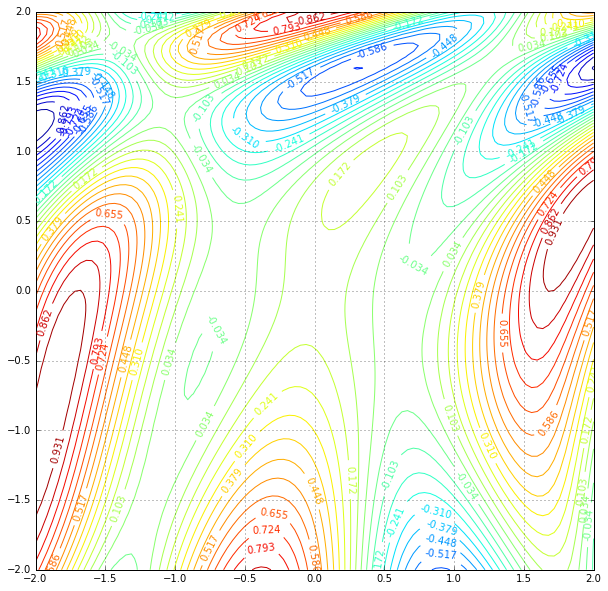

In [48]:
dom_x=np.linspace(-2,2,100)
x_,y_=np.meshgrid(dom_x,dom_x)
Z= np.sin(0.5*x_**2 - 0.25*y_**2 + 3)*np.cos(2*x_ + 1 - np.exp(y_))
V=np.linspace(-1,1,30)
cs=plt.contour(x_,y_,Z,V,cmap='jet')
plt.clabel(cs)
plt.grid()

In [49]:
x=np.random.randint(-100,100,size=2)/100
x=np.array([-0.3,0.5])
x_old=x
x_new=x_old
alpha=0.1
func = lambda x: np.sin(0.5*x[0]**2-0.25*x[1]**2+3)*np.cos(2*x[0]+1-np.exp(x[1]))
grad_f = lambda x: np.array([x[0]*np.cos(0.5*x[0]**2-0.25*x[1]**2+3)*np.cos(2*x[0]+1-np.exp(x[1]))-2*np.sin(0.5*x[0]**2-0.25*x[1]**2+3)*np.sin(2*x[0]+1-np.exp(x[1])),\
                            -0.5*x[1]*np.cos(0.5*x[0]**2-0.25*x[1]**2+3)*np.cos(2*x[0]+1-np.exp(x[1]))+np.exp(x[1])*np.sin(0.5*x[0]**2-0.25*x[1]**2+3)*np.sin(2*x[0]+1-np.exp(x[1])) ])                          
k_max=10000
tau=0.000000001
hist_x=[x_old]
k=0
x_new=x_old-alpha*grad_f(x_old)
hist_x.append(x_new)
while np.linalg.norm(x_new-x_old)**2>tau and k<k_max:
    x_old=x_new
    x_new=x_old-alpha*grad_f(x_old)
    hist_x.append(x_new)
    k+=1
hist_x=np.array(hist_x)


//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


[0.32233102 1.60223831]


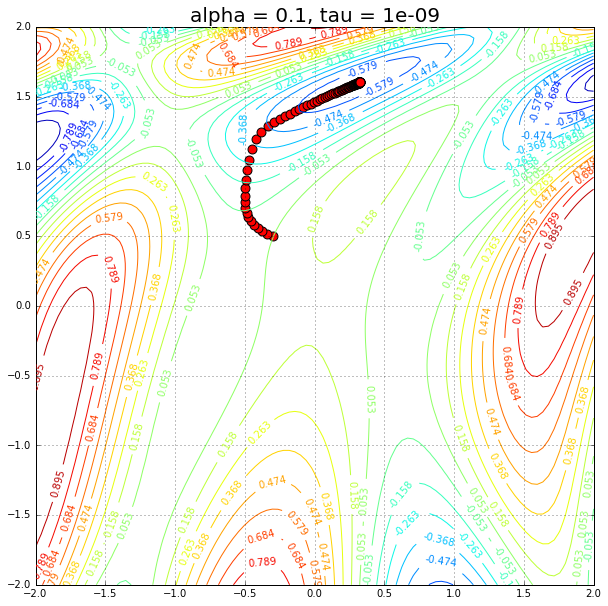

In [51]:
dom_x=np.linspace(-2,2,100)
x_,y_=np.meshgrid(dom_x,dom_x)
Z= np.sin(0.5*x_**2 - 0.25*y_**2 + 3)*np.cos(2*x_ + 1 - np.exp(y_))
V=np.linspace(-1,1,20)
cs=plt.contour(x_,y_,Z,V,cmap='jet')
plt.scatter(hist_x[:,0],hist_x[:,1],c='r',s=80)
plt.clabel(cs)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('alpha = {}, tau = {}'.format(alpha,tau),fontsize=20)
print(hist_x[-1])
plt.clabel(cs)
plt.grid()

### 7. $\quad f(x,y) = (1-x)^{2}+100 \cdot (y - x^{2})^{2}$

### $ \nabla f(x,y) = \left( -2 \cdot (1 - x) - 400 \cdot x \cdot (y - x^2),  200 \cdot (y - x^{2})  \right)     $


//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


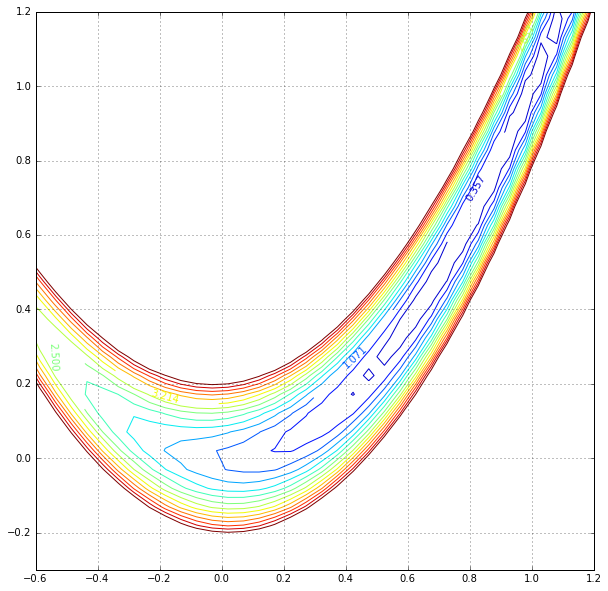

In [52]:
dom_x=np.linspace(-2,3,100)
x_,y_=np.meshgrid(dom_x,dom_x)
Z= (1-x_)**2+100*(y_-x_**2)**2
V=np.linspace(0,5,15)
cs=plt.contour(x_,y_,Z,V,cmap='jet')
plt.clabel(cs)
plt.ylim(-0.3,1.2)
plt.xlim(-0.6,1.2)
plt.grid()

In [53]:
x=np.random.randint(-60,60,size=2)/100
x_old=x
x_new=x_old
alpha=0.001
func = lambda x: (1 - x[0])**2+100*(x[1]-x[0]**2)**2
grad_f = lambda x: np.array([ -2*(1-x[0])-400*x[0]*(x[1]-x[0]**2),200*(x[1]-x[0]**2)  ])                          
k_max=1000000
tau=0.000000001
hist_x=[x_old]
k=0
x_new=x_old-alpha*grad_f(x_old)
hist_x.append(x_new)
while np.linalg.norm(x_new-x_old)**2>tau and k<k_max:
    x_old=x_new
    x_new=x_old-alpha*grad_f(x_old)
    hist_x.append(x_new)
    k+=1
hist_x=np.array(hist_x)


Для оптимизации этой функции потребуется большое количество итераций градиентного спуска, потому что функция имеет целое "плато" минимумов

//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


[0.96563567 0.93231187]


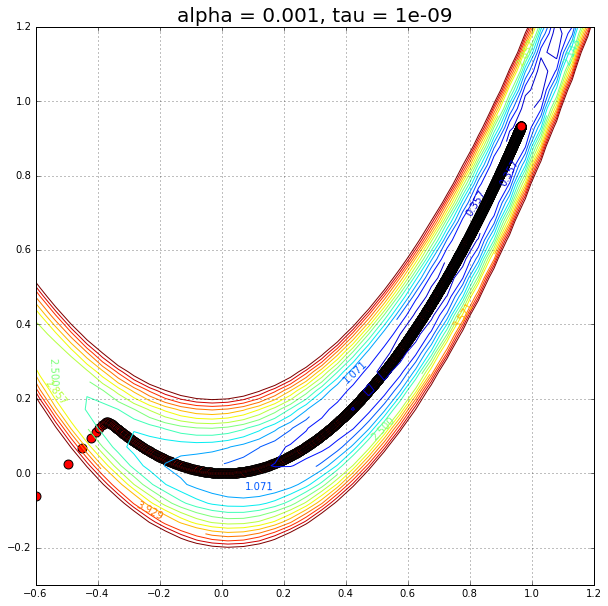

In [55]:
dom_x=np.linspace(-2,3,100)
x_,y_=np.meshgrid(dom_x,dom_x)
Z= (1-x_)**2+100*(y_-x_**2)**2
V=np.linspace(0,5,15)
cs=plt.contour(x_,y_,Z,V,cmap='jet')
plt.scatter(hist_x[:,0],hist_x[:,1],c='r',s=80)
plt.clabel(cs)
plt.title('alpha = {}, tau = {}'.format(alpha,tau),fontsize=20)
print(hist_x[-1])
plt.clabel(cs)
plt.ylim(-0.3,1.2)
plt.xlim(-0.6,1.2)
plt.grid()

### 8.  Найти минимум функции :$\quad f(x) = c^{T}x + \frac{1}{3} \cdot \Vert  x \Vert_{2}^{3}   $




###   $ \nabla_{x}f(x) = c + \frac{1}{3} \cdot \frac{3}{2} \cdot \Vert x \Vert_{2} \cdot 2 x = c + \Vert x \Vert_{2} \cdot x  = 0 \rightarrow \Vert x \Vert_{2} \cdot x = -c \rightarrow \Vert x \Vert_{2}^{2} = \Vert c \Vert_{2} \rightarrow \Vert x \Vert_{2} = (c^{T}c)^{\frac{1}{4}} $

### $ \boxed{x = -\frac{c}{(c^{T}c)^{\frac{1}{4}}} }, \quad f_{min} = - \frac{2}{3} \cdot (c^{T}c)^{\frac{3}{4}}   $

### $ D^{2} f(x) [\Delta x^{2}] = \Delta x_{2}^{T}  \underbrace{\left( \frac{xx^{T}}{\Vert x \Vert_{2}} + I_{n} \cdot \Vert x \Vert_{2}\right)}_{\nabla^{2}f(x)}      \Delta x_{1}      $

### $ x_{k+1} = x_{k} - \alpha_{k} \cdot \Vert x \Vert_{2} \cdot \left( xx^{T} + x^{T}x \cdot I_{n} \right)^{-1} \cdot (c + \Vert x \Vert_{2} \cdot x)  $

Аналитический минимум

In [56]:
d=10
c=np.random.randint(0,15,size=(d,1))
x_opt=-(1/(c.T.dot(c))**0.25)*c
f_min=np.float(-(2/3)*(c.T.dot(c))**(0.75))
f_min

-113.44686798836378

Минимум найденный численно (Методом Ньютона)

In [58]:
kmax=100000
x_old=np.random.randint(0,10,size=(d,1))
x_new=x_old
#x_old=hist_x[np.argmin(hist_norm)]
alpha=1e-3
f = lambda x: np.float(c.T.dot(x)+(1/3)*(x.T.dot(x))**(3/2))
grad_f= lambda x: c+np.linalg.norm(x)*x
hess = lambda x: (1/np.linalg.norm(x))*x.dot(x.T)+np.eye(x.shape[0])*x.T.dot(x)
tol=1e-8
hist_x=[x_old]
hist_f=[f(x_old)]
hist_norm=[np.linalg.norm(hist_x[-1])]
g_f=grad_f(x_old)
hess_inv=np.linalg.inv(hess(x_old))
for i in range(kmax):
    x_new=x_old-alpha*hess_inv.dot(g_f)
    hist_norm.append(np.linalg.norm(x_new-x_old))
    x_old=x_new
    hist_x.append(x_old)
    hist_f.append(f(x_old))
    g_f=grad_f(x_old)
    hess_inv=np.linalg.inv(hess(x_old))
    if np.linalg.norm(hist_f[-1]-hist_f[-2])<tol:
        break
print(i)
hist_x=np.array(hist_x)
hist_f=np.array(hist_f)
hist_norm=np.array(hist_norm)

46916


Совпадают

In [59]:
print(x_opt[:7])
print( )
print(hist_x[-1][:7])

[[-0.54136894]
 [-2.52638836]
 [-2.52638836]
 [-2.34593205]
 [-2.34593205]
 [-0.        ]
 [-0.36091262]]

[[-5.39605069e-01]
 [-2.52757276e+00]
 [-2.52555509e+00]
 [-2.34530242e+00]
 [-2.34703185e+00]
 [ 1.44118948e-03]
 [-3.59928871e-01]]


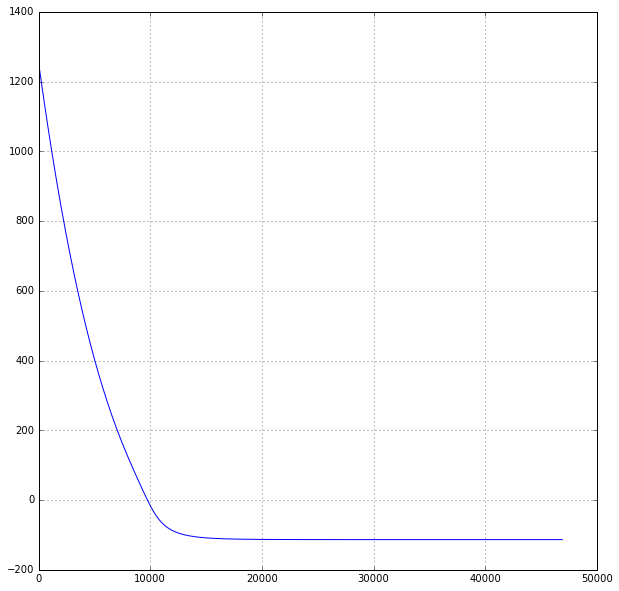

In [61]:
plt.plot(hist_f)
plt.grid()

### 9.  Найти минимум функции: $ \quad f(x) = \frac{1}{2} \cdot x^{T} A x + b^{T}x  $

### $ \nabla_x f(x) = \frac{1}{2} (A + A^{T})x + b = 0 \rightarrow \boxed{ x^{\ast} = -2 (A+A^{T})^{-1}b   }    $ 

### $ f_{min} = 2 b^{T} (A+A^{T})^{-1} A  (A+A^{T})^{-1} b -2 b^{T}(A+A^{T})^{-1}b      $

### $ \nabla_{x}^{2} f(x) = \frac{1}{2} (A + A^{T})   $

In [62]:
f = lambda x: np.float(0.5*x.T.dot(A).dot(x)+b.T.dot(x))
A=np.random.randint(0,15,size=(100,100))
b=np.random.randint(0,10,size=(100,1))
x=np.random.randint(0,10,size=(100,1))
x_opt=-2*np.linalg.inv(A+A.T).dot(b)

In [63]:
f_min=np.float(2*b.T.dot(np.linalg.inv(A+A.T)).dot(A).dot(np.linalg.inv(A+A.T)).dot(b)-2*b.T.dot(np.linalg.inv(A+A.T)).dot(b))
f_min

-12.787167624011712

In [65]:
kmax=100000
x_old=np.random.randint(0,10,size=(100,1))
x_new=x_old
#x_old=hist_x[np.argmin(hist_norm)]
alpha=1e-4
grad_f= lambda x: 0.5*(A+A.T).dot(x)+b
hess = lambda x: 0.5*(A+A.T)
tol=1e-8
hist_x=[x_old]
hist_f=[f(x_old)]
hist_norm=[np.linalg.norm(hist_x[-1])]
g_f=grad_f(x_old)
hess_x_inv=np.linalg.inv(hess(x_old))
for i in range(kmax):
    x_new=x_old-alpha*hess_x_inv.dot(g_f)
    hist_norm.append(np.linalg.norm(x_new-x_old))
    x_old=x_new
    hist_x.append(x_old)
    hist_f.append(f(x_old))
    g_f=grad_f(x_old)
    #hess_x=hess(x_old)
    if np.linalg.norm(hist_f[-1]-hist_f[-2])<tol:
        break
print(i)
hist_grad=np.array([np.linalg.norm(grad_f(hist_x[r])) for r in range(len(hist_x))])
hist_x=np.array(hist_x)
hist_f=np.array(hist_f)
hist_norm=np.array(hist_norm)

99999


In [66]:
print(x_opt[:7])
print( )
print(hist_x[-1][:7])

[[ 0.29692704]
 [ 0.59325808]
 [-0.70170252]
 [ 0.44771965]
 [-0.59162075]
 [-0.41644125]
 [-0.09636833]]

[[ 0.29704969]
 [ 0.59327654]
 [-0.70148917]
 [ 0.44783546]
 [-0.59150315]
 [-0.41615009]
 [-0.09631858]]


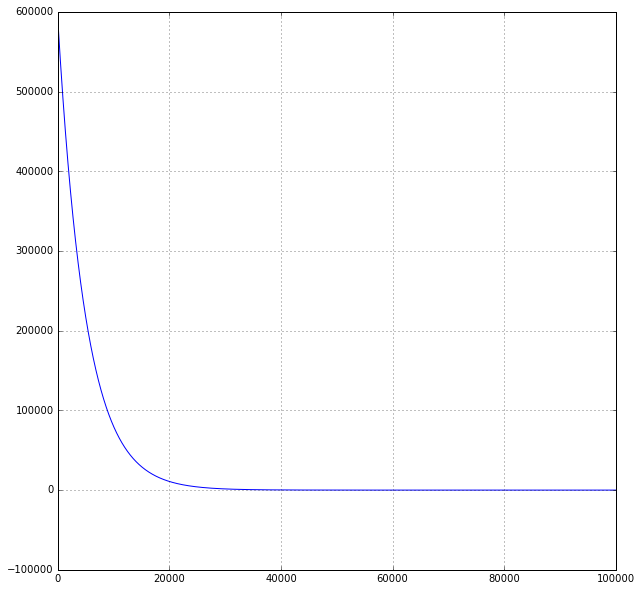

In [67]:
plt.plot(hist_f)
plt.grid()

### 10.  Найти минимум выражения: $\quad f(X)= tr(AX) - \log Det(X), \ \  A,X \in S^{n \times n}_{+ +}  $ -  пространство симметричных положительно определённых матриц
### $ Df(X)[\Delta X] = tr( [A - X^{-1}] \cdot \Delta X  ), \quad D^{2}f(X)[\Delta X^{2}] = D\left( Df(X)[\Delta X_{1}]  \right)[\Delta X_{2}] = D tr([A - X^{-1}] \cdot \Delta X_{1} ) [\Delta X_{2}] = \Delta tr(X^{-1} \cdot \Delta X_{1}) [\Delta X_{2}] = - tr \left( DX^{-1}[\Delta X_{1}]  \right)[\Delta X_{2}] = - tr \left(X^{-1} \Delta X_{2} X^{-1} \Delta X_{1}  \right)    $  

### $\nabla_{X}f(X) = A - X^{-1} = 0 \rightarrow \boxed{X = A^{-1}}         $

### $ f(X + H) = f(X)+ Df(X)[H] + \frac{1}{2} \cdot D^{2}f(X)[H,H] \to \min\limits_{H}  \Rightarrow H = 2 \cdot (X - XAX)$

### $ X_{k+1} = (1 - 2 \cdot \alpha_{k}) \cdot X + 2 \cdot \alpha_{k} \cdot X_{k}AX_{k}  $


In [68]:
f = lambda X: np.trace(A.dot(X))-np.log(np.linalg.det(X))
d=10
A=np.random.randint(5,25,size=(d,d))
A=(A+A.T)+np.eye(A.shape[1])*(abs(np.linalg.eigvals(A+A.T).min())+1)
b=np.random.randint(0,10,size=(d,1))
x=np.random.randint(0,10,size=(d,1))

In [69]:
X_opt=np.linalg.inv(A)
f_min=A.shape[1]+np.log(np.linalg.det(A))
print(f_min)

47.955236408864714


In [71]:
kmax=400000
X_old=np.random.randint(5,20,size=(d,d))
X_old=(X_old+X_old.T)+np.eye(X_old.shape[1])*(abs(np.linalg.eigvals(X_old+X_old.T).min())+1)
X_new=X_old
#X_old=hist_x[np.argmin(hist_f)]
alpha=1e-5
tol=1e-9
hist_x=[X_old]
hist_f=[np.trace(A.dot(X_old))-np.log(np.linalg.det(X_old))]
hist_norm=[np.linalg.norm(hist_x[-1])]
for i in range(kmax):
    #X_new=(1+2*alpha)*X_old-2*alpha*X_old*A*X_old
    X_new=(1+alpha)*X_old-alpha*X_old.dot(A).dot(X_old)
    hist_norm.append(np.linalg.norm(X_new-X_old))
    X_old=X_new
    hist_x.append(X_old)
    hist_f.append(np.trace(A.dot(X_old))-np.log(np.linalg.det(X_old)))
    if np.linalg.norm(hist_f[-1]-hist_f[-2])<tol:
        break
print(i)
hist_x=np.array(hist_x)
hist_f=np.array(hist_f)
hist_norm=np.array(hist_norm)

399999


Аналитический и численный минимумы опять совпадают

In [72]:
print(hist_x[-1][:3,:3])
print( )
print(X_opt[:3,:3])

[[ 0.08442555 -0.05504697 -0.1426621 ]
 [-0.05504697  0.05440047  0.1076707 ]
 [-0.1426621   0.1076707   0.30609014]]

[[ 0.08294311 -0.05408875 -0.14017504]
 [-0.05408875  0.05344344  0.10579753]
 [-0.14017504  0.10579753  0.30073407]]
